In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
df=pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')

In [98]:
select=df['countriesAndTerritories']=='Iran'

In [99]:
df_iran=df.loc[select,:].sort_values(by='dateRep').set_index('dateRep')#reset_index(drop=True)
df_iran

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
2020-01-01,1,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
2020-01-02,2,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
2020-01-03,3,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
2020-01-04,4,1,2020,0,0,Iran,IR,IRN,82913893.0,Asia,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,16,11,2020,12543,459,Iran,IR,IRN,82913893.0,Asia,170.751843
2020-11-17,17,11,2020,13053,486,Iran,IR,IRN,82913893.0,Asia,176.497562
2020-11-18,18,11,2020,13352,482,Iran,IR,IRN,82913893.0,Asia,181.828394


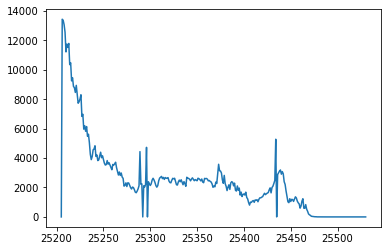

In [100]:
#df.loc[select,'cases']
plt.plot(df.loc[select,'cases'])

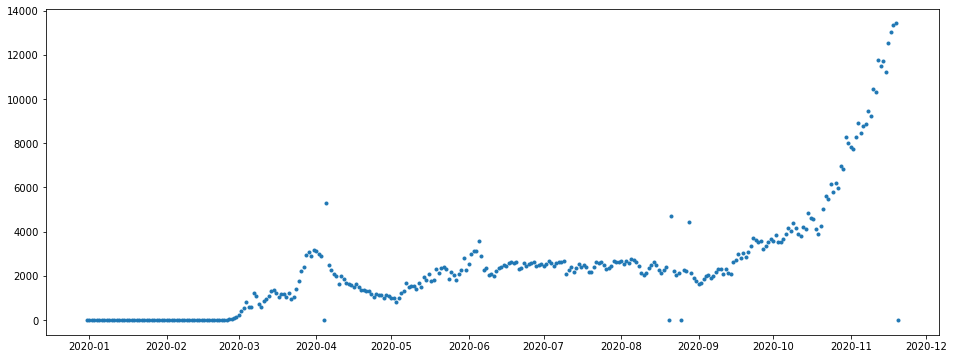

In [101]:
plt.figure(figsize=(16,6))
plt.plot(df_iran.loc[:,'cases'],'.')

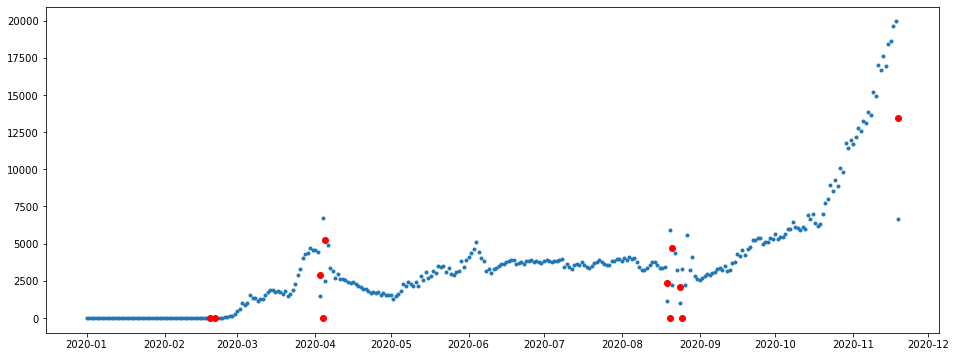

In [102]:
df_iran['expected']=df_iran['cases'].shift(-1)+df_iran['cases'].shift(1)/2
isoutlier=(np.abs((df_iran.loc[:,'expected']-df_iran.loc[:,'cases'])/df_iran.loc[:,'expected'])>0.7)
plt.figure(figsize=(16,6))
plt.plot(df_iran.loc[:,'expected'],'.')
plt.plot(df_iran.loc[isoutlier,'cases'],'or')


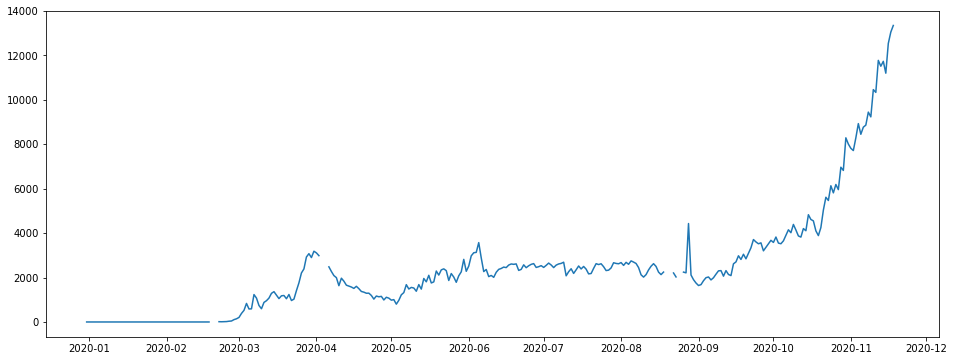

In [103]:
#plt.plot(df.loc[select,'cases'])'
plt.figure(figsize=(16,6))
df_iran.loc[isoutlier,'cases']=np.nan
plt.plot(df_iran.loc[:,'cases'])

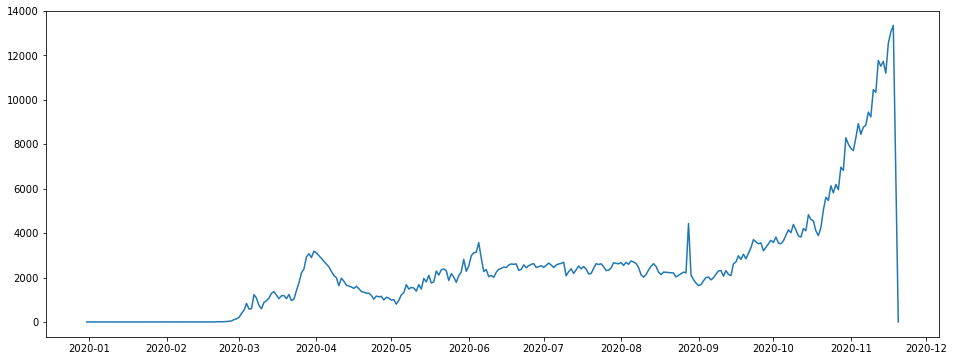

In [95]:
plt.figure(figsize=(16,6))
df_iran.loc[:,'cases']=df_iran.loc[:,'cases'].interpolate(method='linear')
plt.plot(df_iran.loc[:,'cases'])